# Overfitting Practise 

Scenario: A dataset has been loaded from the UCI Machine Learning Repository that describes the performance in mathematics of students from two Portuguese schools.

I am going to implement a multiple linear regression model to predict the final grade of the students based on a number of features in the dataset.

Exercise 1: 

Set the target variable as y and the predictor variables as the matrix X. Calculate the number of features in the dataset, save it as num_features and press “Run”. (Note that the number of features is equal to the number of columns in X.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./student_math.csv")
print(df.head())

#setting target and predictor variables
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Number of features
num_features = len(X.columns)
print("Number of features: ",num_features)

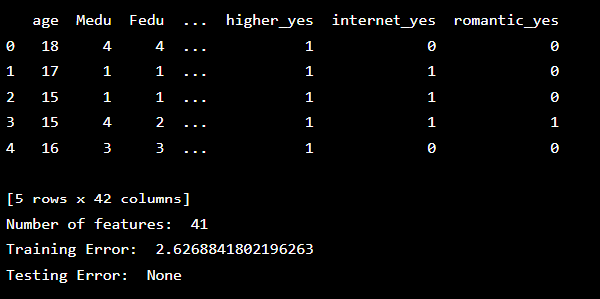

Exercise 2:

We’re about to fit a model with 42 parameters (one intercept and 41 coefficients for each predictor). This might make us worry about overfitting because:

* The model is very complex.
* We haven’t checked if the features are too similar to each other (collinearity).
To check for overfitting, we’ll fit the model.

The data is split into training and test sets. We’ll fit a regression model using all 41 features and calculate the Mean Squared Error (MSE) on the training data.

* Testing Error, fill in the code to calculate the MSE for the test set. Save the result as MSE_test (currently set to None).


In [ ]:
# Importing the function
from sklearn.model_selection import train_test_split

# Performing a Train-Test split (This function is used to split the dataset into training and testing sets.)

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# This line performs the actual split. Here’s what each part means:
# X and y: These are the features (input data) and labels (target data), respectively.
# test_size=0.33: This specifies that 33% of the data should be used for testing, and the remaining 67% for training.
# random_state=42: This ensures that the split is reproducible. Using the same random_state value will always produce the same split.

# Output Variables:
# X_train: The training set features.
# X_test: The testing set features.
# y_train: The training set labels.
# y_test: The testing set labels.

In [ ]:
#Fitting a Linear Regression Model ( trains the linear regression model using the training dat)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#Training Error
#Predicting Training Data
pred_train = model.predict(X_train)

#This line uses the trained linear regression model to make predictions on the training data (X_train). 
#The predicted values are stored in pred_train

#Calculating Mean Squared Error (MSE)
MSE_train = np.mean((pred_train - y_train)**2)

#This line calculates the Mean Squared Error (MSE) for the training data. Here’s how it works:
#pred_train - y_train: This computes the difference between the predicted values and the actual values (residuals).
#(pred_train - y_train)**2: This squares the residuals to ensure they are positive and to penalize larger errors more.
#np.mean(...): This calculates the average of these squared residuals, giving the MSE

print("Training Error: ", MSE_train)

#This line prints the calculated MSE for the training data, which is a measure of how well the model fits the training data. 
# A lower MSE indicates a better fit.



In [ ]:
# 2. Testing Error
pred_test = model.predict(X_test)
MSE_test = np.mean((pred_test - y_test)**2)
print("Testing Error: ", MSE_test)


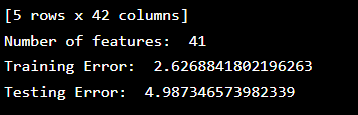

We see that the error on the test data is almost double the error with the training data! This is definitely an indicator of overfitting

Exercise 3

I am now going to check the coefficients evaluated by the model to see if I can catch this (if its overfitting)


In [ ]:
#Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

# 3. Plotting the Coefficients

plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()

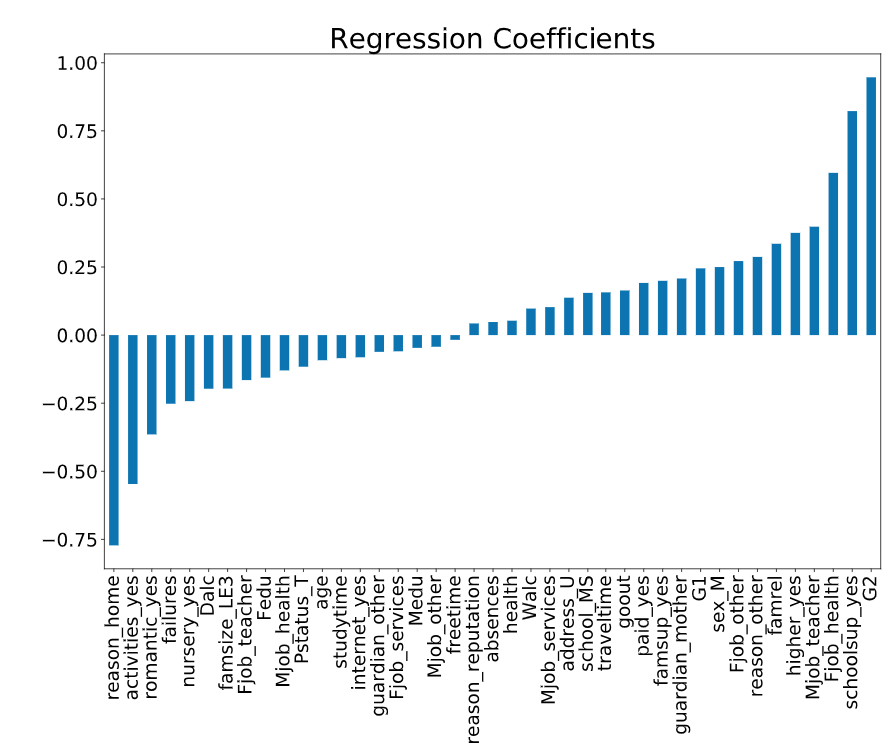

We see that there are a few negatively correlated coefficients here (coefficients with roughly similar values mirrored about the axis), which is also a sign of overfitting.